In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [7]:
 
pokemon = pd.read_csv('pokemon.csv')
pokemon.head(10)





,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


Index([5, 1, 3, 4, 2, 7, 6], dtype='int64', name='generation_id')


<Axes: xlabel='generation_id', ylabel='count'>

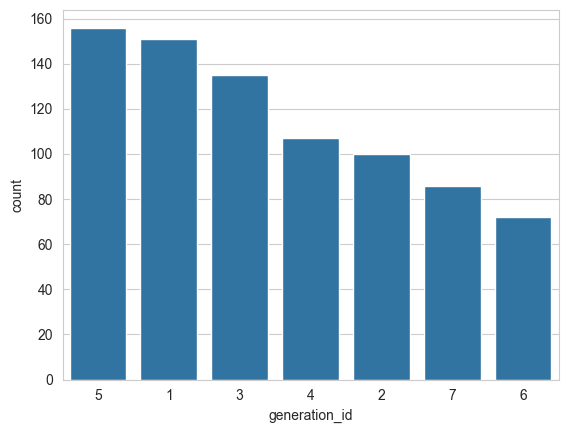

In [8]:
gen_order = pokemon['generation_id'].value_counts().index;
print(gen_order)
sb.countplot(data=pokemon, x='generation_id', order=gen_order)


<Axes: xlabel='count', ylabel='type_1'>

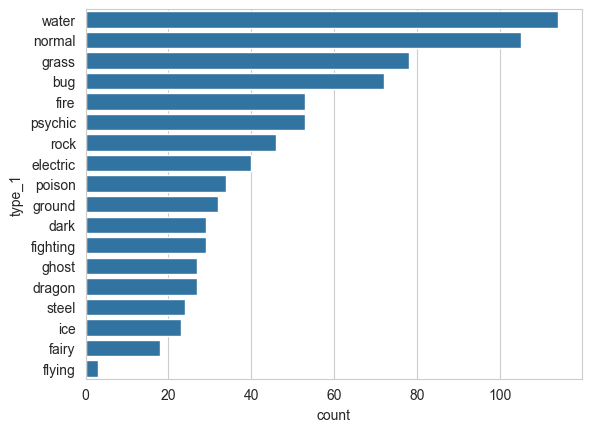

In [10]:
type_order = pokemon['type_1'].value_counts().index;
sb.countplot(data=pokemon, y='type_1', order= type_order)

In [11]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                          value_vars=['type_1', 'type_2'],
                          var_name='type_level',
                          value_name='type')
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


type
water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: count, dtype: int64


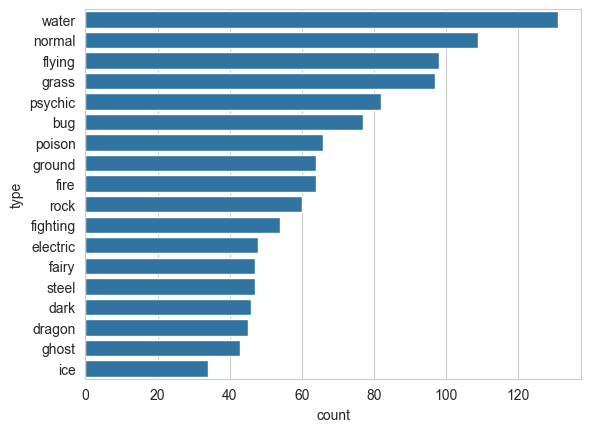

In [14]:
type_counts = pkmn_types['type'].value_counts()
print(type_counts)
type_order = type_counts.index
type_order
sb.countplot(data=pkmn_types, y='type', order=type_order);



In [15]:
# Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()
n_pokemon
# Return the highest frequency in the `type` column
max_type_count = type_counts[0]

# Return the maximum proportion, or in other words,
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

/var/folders/_4/3wtymdf92x7cybrp119bfcr00000gn/T/ipykernel_32281/298170767.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_type_count = type_counts[0]


0.10808580858085809


In [16]:
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [17]:
# Use a list comprehension to create tick_names that we will apply to the tick labels.
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

/var/folders/_4/3wtymdf92x7cybrp119bfcr00000gn/T/ipykernel_32281/2956330542.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = type_counts[i]


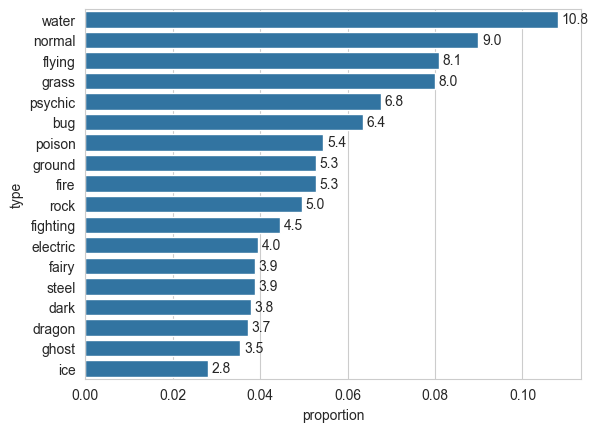

In [19]:
sb.countplot(data=pkmn_types, y='type', order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');
# Logic to print the proportion text on the bars

for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar.
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')